1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [1]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data
import pandas as pd # standard naming convention
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'data/regression_generated.csv')  
data

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


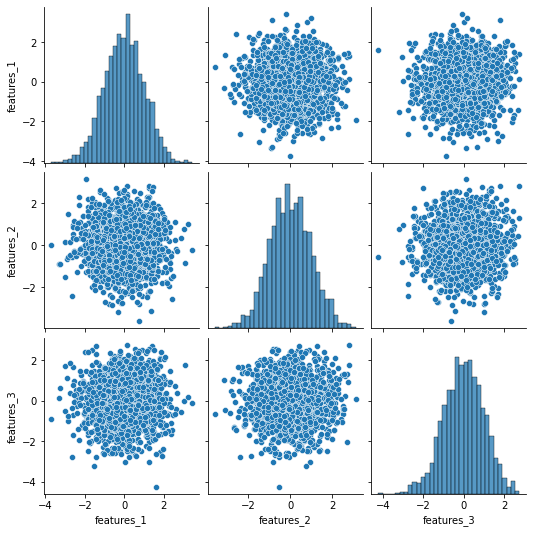

In [3]:
sns.pairplot(data[['features_1', 'features_2', 'features_3']])

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

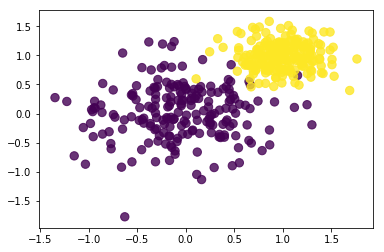

In [4]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

In [5]:
def generate_dataset(n_samples, loc1, scale1, loc2, scale2):
  
    features1 = np.random.normal(loc=loc1, scale=scale1, size=(n_samples, 2))
    df1 = pd.DataFrame(features1, columns=['x', 'y'])
    df1['label'] = 0

    features2 = np.random.normal(loc=loc2, scale=scale2, size=(n_samples, 2))
    df2 = pd.DataFrame(features2, columns=['x', 'y'])
    df2['label'] = 1

    return pd.concat([df1, df2], ignore_index=True)

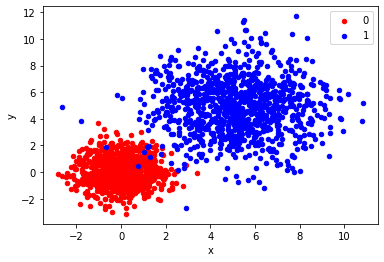

In [6]:
df = generate_dataset(1000, 0, 1, 5, 2)

colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pickle


In [8]:
filename = 'data/residuals_261.pkl'
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
df = pd.DataFrame.from_dict(new_dict.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


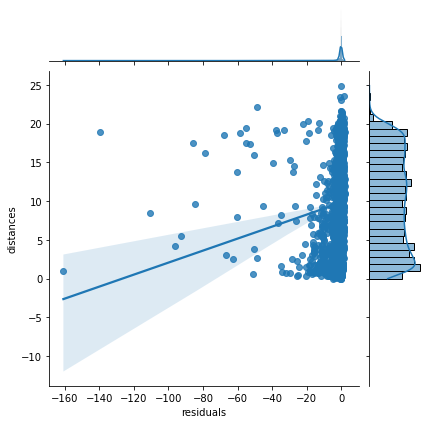

In [9]:
df = df[df['residuals'] < 2]

sns.jointplot(data=df, x='residuals', y='distances', kind="reg")

/var/folders/g8/2vq2l7k14yzfk682c_hpvjg80000gn/T/ipykernel_18233/3678487404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bins'] = pd.cut(df['distances'], bins=xedges, labels=False)


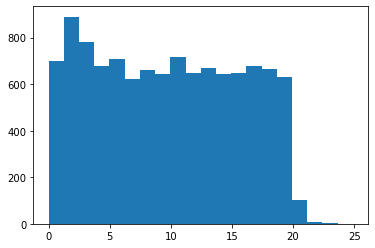

In [10]:
h, xedges, patches = plt.hist(df['distances'], bins=20)
x = (xedges[:-1] + xedges[1:]) / 2
df['bins'] = pd.cut(df['distances'], bins=xedges, labels=False)
y = df.groupby('bins')['residuals'].mean().values
err_y = df.groupby('bins')['residuals'].std().values

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [11]:
import scipy

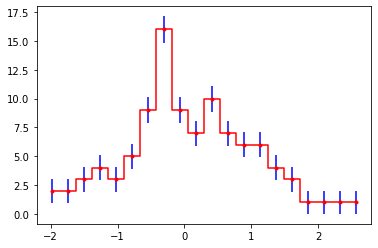

In [12]:
x = np.random.normal(loc=0., scale=1., size=(100,))
y, bin_edges = np.histogram(x, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

plt.errorbar(bin_centers, y, yerr = y**0.05, marker = '.', drawstyle = 'steps-mid', color = "red", ecolor = "blue",)
plt.show()

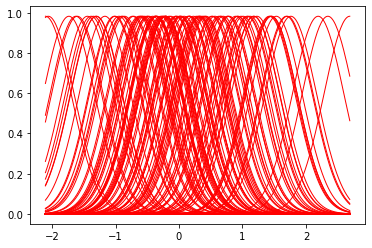

In [13]:
def create_gaussians(x, scale=None):
    # default scale
    if scale is None:
        scale = 1.06 * np.std(x) * np.power(len(x), -1/5)
    
    grid  = np.linspace(min(x), max(x), 300)
    # for each x create gaussian and save to 
    kernels = []
    for elem in x:
        kernel = scipy.stats.norm(elem, scale).pdf(grid)
        kernels.append(kernel)
        plt.plot(grid, kernel, lw=1, color="r")
    
      
    return np.array(kernels)

gaussians = create_gaussians(x)

(array([0.08343232, 0.14600657, 0.16686465, 0.52145202, 0.33372929,
        0.35458737, 0.25029697, 0.14600657, 0.04171616, 0.04171616]),
 array([-2.10434711, -1.62491662, -1.14548612, -0.66605562, -0.18662513,
         0.29280537,  0.77223587,  1.25166636,  1.73109686,  2.21052736,
         2.68995785]),
 <BarContainer object of 10 artists>)

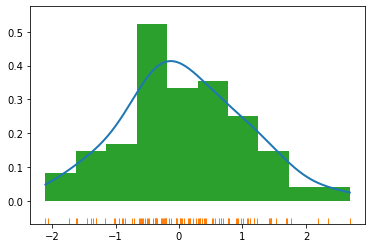

In [14]:
grid  = np.linspace(min(x), max(x), 300)
density = np.sum(gaussians, axis=0) / scipy.integrate.trapz(np.sum(gaussians, axis=0), grid)
plt.plot(grid, density, lw=2)
_ = sns.rugplot(x)
plt.hist(x, bins='auto', density=True)